# Chess+Dataset

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from networkx.drawing.nx_pydot import write_dot
from networkx.linalg.graphmatrix import *
from networkx.algorithms.approximation import *
#from networkx.centrality import closn
from networkx.algorithms import *
import gc
gc.collect()


21

In [2]:
#input = pd.read_csv("/home/abhishek/Graph/titanic.csv")
input = pd.read_csv("/home/abhishek/Graph/kr-vs-kp.csv")
#input = pd.read_excel("Immunotherapy.xlsx")

In [3]:
input.head(5)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg,outcome
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [4]:
del(input["outcome"])

In [5]:
input.columns

Index(['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq', 'bkxcr', 'bkxwp',
       'blxwp', 'bxqsq', 'cntxt', 'dsopp', 'dwipd', 'hdchk', 'katri', 'mulch',
       'qxmsq', 'r2ar8', 'reskd', 'reskr', 'rimmx', 'rkxwp', 'rxmsq', 'simpl',
       'skach', 'skewr', 'skrxp', 'spcop', 'stlmt', 'thrsk', 'wkcti', 'wkna8',
       'wknck', 'wkovl', 'wkpos', 'wtoeg'],
      dtype='object')

In [6]:
#set(input['katri'])

In [7]:
input.loc[input['cntxt'] == 'f','cntxt'] = '1'
input.loc[input['cntxt'] == 't','cntxt'] = '2'

input.loc[input['dsopp'] == 'f','dsopp'] = '1'
input.loc[input['dsopp'] == 't','dsopp'] = '2'

input.loc[input['dwipd'] == 'g','dwipd'] = '1'
input.loc[input['dwipd'] == 'l','dwipd'] = '2'

input.loc[input['katri'] == 'b','katri'] = '1'
input.loc[input['katri'] == 'n','katri'] = '2'
input.loc[input['katri'] == 'w','katri'] = '3'

In [8]:
input.loc[input['wkpos'] == 'f','wkpos'] = '1'
input.loc[input['wkpos'] == 't','wkpos'] = '2'

input.loc[input['blxwp'] == 'f','blxwp'] = '1'
input.loc[input['blxwp'] == 't','blxwp'] = '2'

input.loc[input['qxmsq'] == 'f','qxmsq'] = '1'
input.loc[input['qxmsq'] == 't','qxmsq'] = '2'

input.loc[input['skewr'] == 'f','skewr'] = '1'
input.loc[input['skewr'] == 't','skewr'] = '2'

input.loc[input['bkxbq'] == 'f','bkxbq'] = '1'
input.loc[input['bkxbq'] == 't','bkxbq'] = '2'

input.loc[input['bkxcr'] == 'f','bkxcr'] = '1'
input.loc[input['bkxcr'] == 't','bkxcr'] = '2'

input.loc[input['bkxwp'] == 'f','bkxwp'] = '1'
input.loc[input['bkxwp'] == 't','bkxwp'] = '2'

input.loc[input['bxqsq'] == 'f','bxqsq'] = '1'
input.loc[input['bxqsq'] == 't','bxqsq'] = '2'

In [9]:
input.loc[input['bkon8'] == 'f','bkon8'] = '1'
input.loc[input['bkon8'] == 't','bkon8'] = '2'

input.loc[input['bknwy'] == 'f','bknwy'] = '1'
input.loc[input['bknwy'] == 't','bknwy'] = '2'

input.loc[input['wtoeg'] == 'n','wtoeg'] = '1'
input.loc[input['wtoeg'] == 't','wtoeg'] = '2'

input.loc[input['thrsk'] == 'f','thrsk'] = '1'
input.loc[input['thrsk'] == 't','thrsk'] = '2'

input.loc[input['wkcti'] == 'f','wkcti'] = '1'
input.loc[input['wkcti'] == 't','wkcti'] = '2'

input.loc[input['wkna8'] == 'f','wkna8'] = '1'
input.loc[input['wkna8'] == 't','wkna8'] = '2'

input.loc[input['wknck'] == 'f','wknck'] = '1'
input.loc[input['wknck'] == 't','wknck'] = '2'

input.loc[input['wkovl'] == 'f','wkovl'] = '1'
input.loc[input['wkovl'] == 't','wkovl'] = '2'

In [10]:
input.loc[input['reskr'] == 'f','reskr'] = '1'
input.loc[input['reskr'] == 't','reskr'] = '2'

input.loc[input['r2ar8'] == 'f','r2ar8'] = '1'
input.loc[input['r2ar8'] == 't','r2ar8'] = '2'

input.loc[input['bkblk'] == 'f','bkblk'] = '1'
input.loc[input['bkblk'] == 't','bkblk'] = '2'

input.loc[input['mulch'] == 'f','mulch'] = '1'
input.loc[input['mulch'] == 't','mulch'] = '2'

input.loc[input['rxmsq'] == 'f','rxmsq'] = '1'
input.loc[input['rxmsq'] == 't','rxmsq'] = '2'

input.loc[input['skrxp'] == 'f','skrxp'] = '1'
input.loc[input['skrxp'] == 't','skrxp'] = '2'

input.loc[input['spcop'] == 'f','spcop'] = '1'
input.loc[input['spcop'] == 't','spcop'] = '2'

input.loc[input['bkona'] == 'f','bkona'] = '1'
input.loc[input['bkona'] == 't','bkona'] = '2'

In [11]:
input.loc[input['reskd'] == 'f','reskd'] = '1'
input.loc[input['reskd'] == 't','reskd'] = '2'

input.loc[input['stlmt'] == 'f','stlmt'] = '1'
input.loc[input['stlmt'] == 't','stlmt'] = '2'

input.loc[input['hdchk'] == 'f','hdchk'] = '1'
input.loc[input['hdchk'] == 't','hdchk'] = '2'

input.loc[input['skach'] == 'f','skach'] = '1'
input.loc[input['skach'] == 't','skach'] = '2'

input.loc[input['simpl'] == 'f','simpl'] = '1'
input.loc[input['simpl'] == 't','simpl'] = '2'

input.loc[input['bkspr'] == 'f','bkspr'] = '1'
input.loc[input['bkspr'] == 't','bkspr'] = '2'

input.loc[input['rkxwp'] == 'f','rkxwp'] = '1'
input.loc[input['rkxwp'] == 't','rkxwp'] = '2'

input.loc[input['rimmx'] == 'f','rimmx'] = '1'
input.loc[input['rimmx'] == 't','rimmx'] = '2'

In [12]:
#set(input['stlmt'])

In [13]:
total_rows=len(input.axes[0])
total_cols=len(input.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))
print("Max of connection in graph: "+str(total_rows*total_cols))
input.describe()

Number of Rows: 3196
Number of Columns: 36
Max of connection in graph: 115056


,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
count,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196,...,3196,3196,3196,3196,3196,3196,3196,3196,3196,3196
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
freq,2839,2971,3076,2874,2129,1722,2026,2500,1980,2225,...,3021,3195,3149,3060,2631,3021,1984,2007,2345,2407


In [14]:
#input(input)
input.head(5) 

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
1,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
2,1,1,1,1,2,1,2,1,1,1,...,1,1,1,1,1,1,1,2,2,1
3,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,2,2,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1


In [15]:
#input = Survived_0
input.shape

(3196, 36)

In [16]:
'''input['Age_prect_10'] = pd.qcut(input['Age'], q=4)
input['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))

input['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)
input['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))

input.loc[input['Sex'] == 'male', 'sex'] = '1'
input.loc[input['Sex'] == 'female', 'sex'] = '0'
#input.head(5)'''

"input['Age_prect_10'] = pd.qcut(input['Age'], q=4)\ninput['Age_prect_level'] = pd.qcut(input['Age'], q=4, labels=(1,2,3,4))\n\ninput['Fare_prect_10'] = pd.qcut(input['Fare'], q=4)\ninput['Fare_prect_level'] = pd.qcut(input['Fare'], q=4, labels=(1,2,3,4))\n\ninput.loc[input['Sex'] == 'male', 'sex'] = '1'\ninput.loc[input['Sex'] == 'female', 'sex'] = '0'\n#input.head(5)"

In [17]:
#drop un-use column
'''del input['Fare']
del input['Age'] 
del input['Age_prect_10'] 
del input['Fare_prect_10'] 
del input['Sex']''' 
input.head(5)

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
1,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
2,1,1,1,1,2,1,2,1,1,1,...,1,1,1,1,1,1,1,2,2,1
3,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,2,2,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1


In [18]:
input.columns

Index(['bkblk', 'bknwy', 'bkon8', 'bkona', 'bkspr', 'bkxbq', 'bkxcr', 'bkxwp',
       'blxwp', 'bxqsq', 'cntxt', 'dsopp', 'dwipd', 'hdchk', 'katri', 'mulch',
       'qxmsq', 'r2ar8', 'reskd', 'reskr', 'rimmx', 'rkxwp', 'rxmsq', 'simpl',
       'skach', 'skewr', 'skrxp', 'spcop', 'stlmt', 'thrsk', 'wkcti', 'wkna8',
       'wknck', 'wkovl', 'wkpos', 'wtoeg'],
      dtype='object')

In [19]:
def create_graph_data(input):
    another_input_list = []
    count = 0
    for i in range(len(input.axes[1])-1): #range(len(input.axes[1])-1)
        if len(input.axes[1]) > i :
            current_col = input.axes[1][i]
            next_col = input.axes[1][i+1]

            for j in range(len(input.axes[0])):
                item = str(input.axes[1][i])+'_'+str(input[current_col][j]),str(input.axes[1][i+1])+'_'+str(input[next_col][j]),input[next_col][j]
                another_input_list.append(item)
                count = count + j
            #
            #print(next_col,len(input.axes[1]),i,j)
        else:
            print("end")

    #print('number of combination of edge (%d)' % (count))
    
    return another_input_list

In [20]:
def graph_create(another_input_list):
    
    MG_1 = nx.DiGraph()
    MG_1.add_weighted_edges_from(another_input_list)
    pos = nx.nx_agraph.graphviz_layout(MG_1)
    nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
    plt.axis("Off")
    plt.show()
    print(MG_1.nodes())
    print('Number of edges',MG_1.number_of_edges())
    print('Number of Nodes',MG_1.number_of_nodes())
    return MG_1

# this code will print nice graph

In [21]:
#### this code will print nice graph
#MG_1 = graph_create(another_input_list)
#nx.nx_agraph.view_pygraphviz(MG_1)

In [22]:
def column_arrange (col_name,edge_impotance_order):
    col_name = list(col_name)
    temp = list(edge_impotance_order)[0].rpartition('_')[0]
    print('High ranked column ---->',temp)
    #print('\nOld column name order\n',col_name)
    col_name.remove(temp)
    col_name.insert(0,temp)
    #print('\nNew column name order\n',col_name)
    
    return list(col_name),temp
    #edge_impotance_order.keys()
    #google_PGR_O = google_matrix(MG_1, alpha=0.9)
    #google_PGR_O

In [23]:
def variable_imp (another_input_list):
    
    ################
    # approach-1    
    ################
    print("\nDiGraph")
    MG_1 = graph_create(another_input_list)
    edge_impotance_weight = {}
    edge_impotance_order = {}
    W=MG_1.edges.data('weight', default=1)
    count = 1
    while (MG_1.number_of_nodes() > 0):
        '''
        pos = nx.nx_agraph.graphviz_layout(MG_1)
        nx.draw(MG_1, pos=pos,with_labels=True,node_color='r', edge_color='b',
            fontsize=1,width = 0.4, alpha = 0.7, scale = 10)
        plt.axis("Off")
        plt.show()
        '''
        PGR_O = nx.pagerank(MG_1, alpha=0.90,max_iter=100, weight=W) 
        # , nstart=W this could be the start value of each node
        #type(PGR_O)
        #print(max(PGR_O.keys()))
        #print(round(max(PGR_O.values()),5))  # maximum rank of the node

        for key, value in PGR_O.items():
            if round(value,5) == round(max(PGR_O.values()),5):
                #print('Edge name -> ',key, '->', round(value,5))
                edge_impotance_weight.update({key:round(value,5)})
                edge_impotance_order.update({key:count})
                MG_1.remove_node(key)
                count = count + 1
                #print('Number of edge',MG_1.number_of_edges(key))

    return edge_impotance_weight,edge_impotance_order

# Run one time with default order of column

In [24]:
# Run one time with default order of column
col_name = input.columns
input = input.reindex(columns=col_name)
input.head(5)
#another_input_list = create_graph_data(input)
#another_input_list[0:5]

,bkblk,bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,...,skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
1,1,1,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1
2,1,1,1,1,2,1,2,1,1,1,...,1,1,1,1,1,1,1,2,2,1
3,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,2,2,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,2,2,1


In [25]:
#another_input_list = create_graph_data(input)

# create graph and node important for data set
#edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)


DiGraph


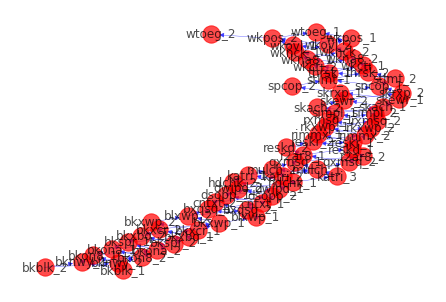

['bkblk_1', 'bknwy_1', 'bkblk_2', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'qxmsq_1', 'qxmsq_2', 'r2ar8_2', 'r2ar8_1', 'reskd_1', 'reskd_2', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skewr_2', 'skewr_1', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'wtoeg_1', 'wtoeg_2']
Number of edges 136
Number of Nodes 73
High ranked column ----> wtoeg

DiGraph


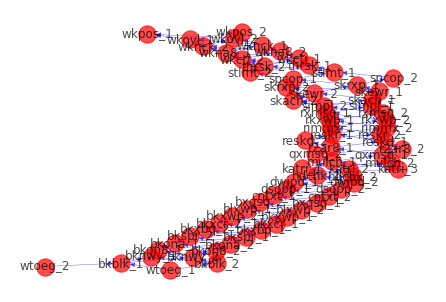

['wtoeg_1', 'bkblk_1', 'bkblk_2', 'wtoeg_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'qxmsq_1', 'qxmsq_2', 'r2ar8_2', 'r2ar8_1', 'reskd_1', 'reskd_2', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skewr_2', 'skewr_1', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 136
Number of Nodes 73
High ranked column ----> spcop

DiGraph


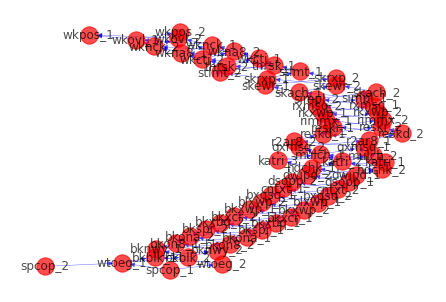

['spcop_1', 'wtoeg_1', 'wtoeg_2', 'spcop_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'qxmsq_1', 'qxmsq_2', 'r2ar8_2', 'r2ar8_1', 'reskd_1', 'reskd_2', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skewr_2', 'skewr_1', 'skrxp_1', 'skrxp_2', 'stlmt_1', 'stlmt_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 136
Number of Nodes 73
High ranked column ----> stlmt

DiGraph


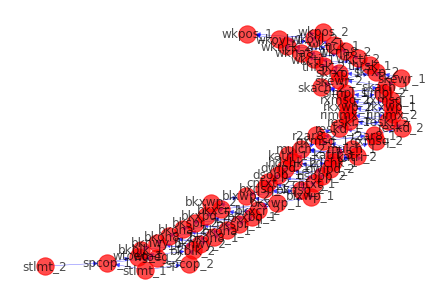

['stlmt_1', 'spcop_1', 'stlmt_2', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'qxmsq_1', 'qxmsq_2', 'r2ar8_2', 'r2ar8_1', 'reskd_1', 'reskd_2', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skewr_2', 'skewr_1', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 136
Number of Nodes 73
High ranked column ----> skewr

DiGraph


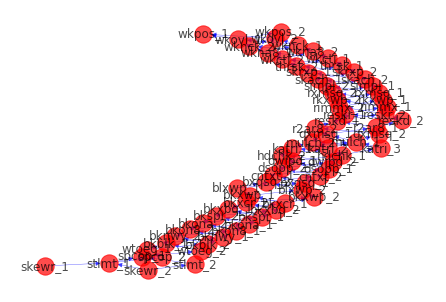

['skewr_2', 'stlmt_1', 'skewr_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'qxmsq_1', 'qxmsq_2', 'r2ar8_2', 'r2ar8_1', 'reskd_1', 'reskd_2', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 136
Number of Nodes 73
High ranked column ----> reskd

DiGraph


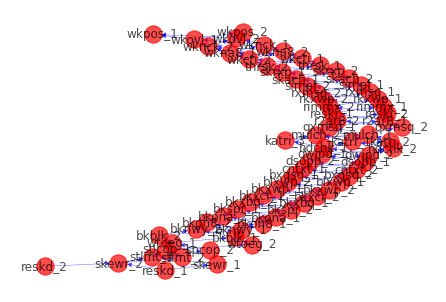

['reskd_1', 'skewr_2', 'skewr_1', 'reskd_2', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'qxmsq_1', 'qxmsq_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 136
Number of Nodes 73
High ranked column ----> qxmsq

DiGraph


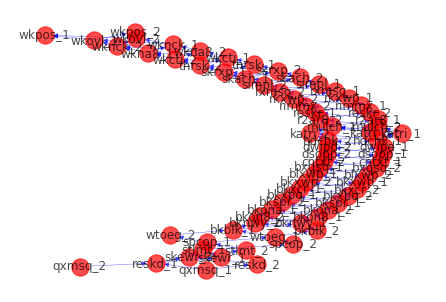

['qxmsq_1', 'reskd_1', 'qxmsq_2', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'blxwp_1', 'blxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 136
Number of Nodes 73
High ranked column ----> blxwp

DiGraph


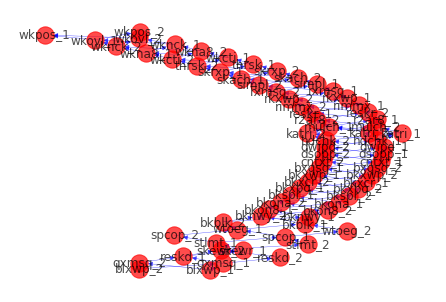

['blxwp_1', 'qxmsq_1', 'blxwp_2', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1']
Number of edges 137
Number of Nodes 73
High ranked column ----> wkpos

DiGraph


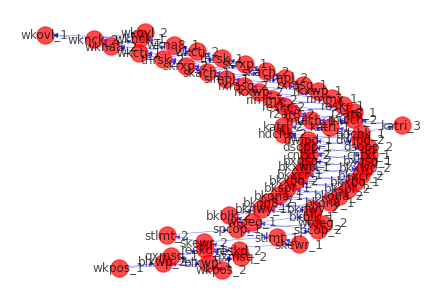

['wkpos_2', 'blxwp_1', 'blxwp_2', 'wkpos_1', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1']
Number of edges 137
Number of Nodes 73
High ranked column ----> wkovl

DiGraph


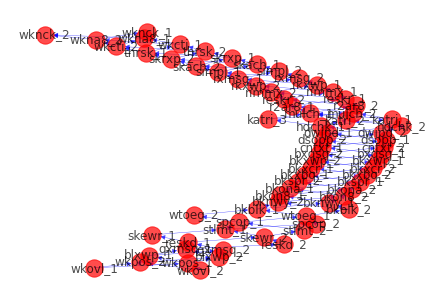

['wkovl_2', 'wkpos_2', 'wkpos_1', 'wkovl_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> wknck

DiGraph


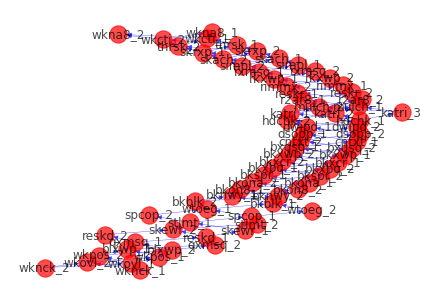

['wknck_1', 'wkovl_2', 'wkovl_1', 'wknck_2', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> wkna8

DiGraph


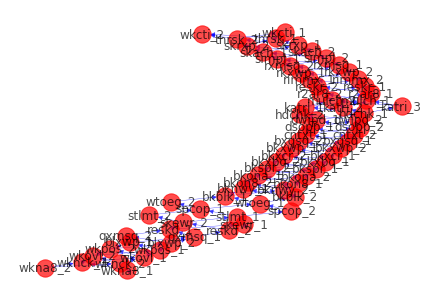

['wkna8_1', 'wknck_1', 'wknck_2', 'wkna8_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> wkcti

DiGraph


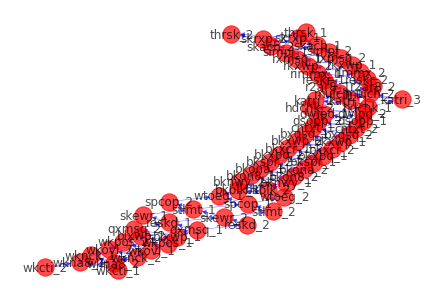

['wkcti_1', 'wkna8_1', 'wkcti_2', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2', 'thrsk_1', 'thrsk_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> thrsk

DiGraph


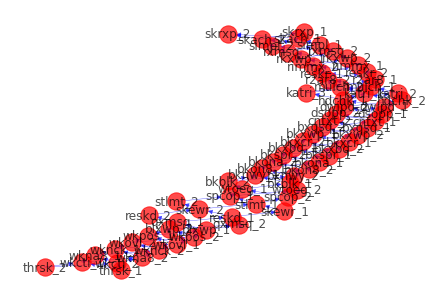

['thrsk_1', 'wkcti_1', 'thrsk_2', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> bkblk

DiGraph


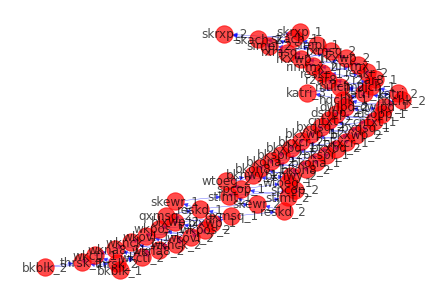

['bkblk_1', 'thrsk_1', 'thrsk_2', 'bkblk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'wtoeg_1', 'wtoeg_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> wtoeg

DiGraph


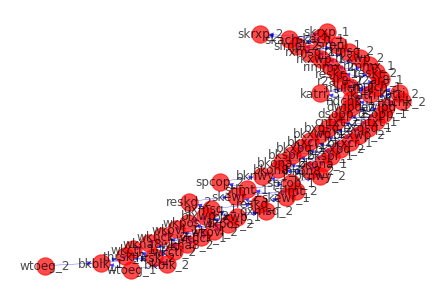

['wtoeg_1', 'bkblk_1', 'bkblk_2', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'bknwy_1', 'bknwy_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> bknwy

DiGraph


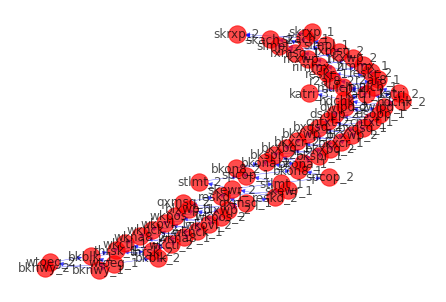

['bknwy_1', 'wtoeg_1', 'bknwy_2', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'bkon8_1', 'bkon8_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> bkon8

DiGraph


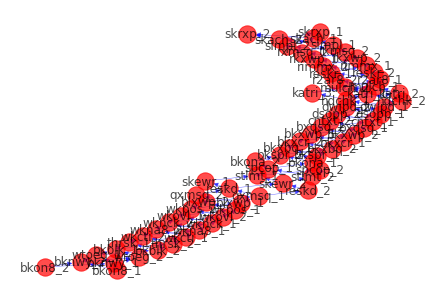

['bkon8_1', 'bknwy_1', 'bkon8_2', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'bkona_1', 'bkona_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> bkona

DiGraph


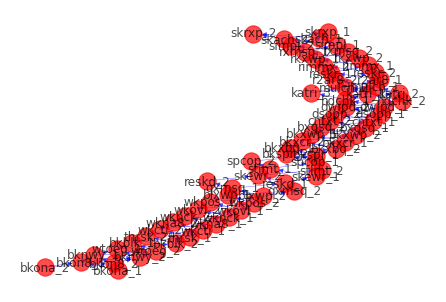

['bkona_1', 'bkon8_1', 'bkona_2', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'bkspr_1', 'bkspr_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> bkspr

DiGraph


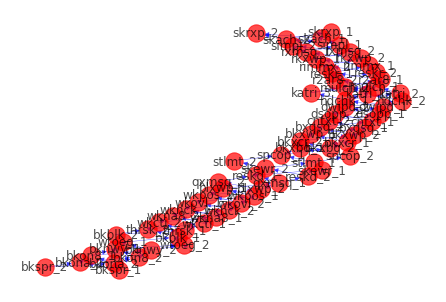

['bkspr_1', 'bkona_1', 'bkspr_2', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'reskd_1', 'reskd_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> reskd

DiGraph


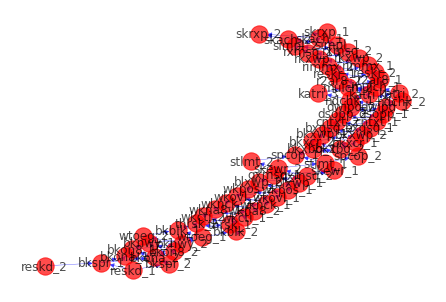

['reskd_1', 'bkspr_1', 'bkspr_2', 'reskd_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'stlmt_1', 'stlmt_2', 'spcop_1', 'spcop_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> stlmt

DiGraph


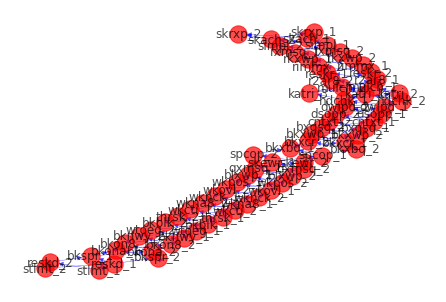

['stlmt_1', 'reskd_1', 'reskd_2', 'stlmt_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'spcop_1', 'spcop_2', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 139
Number of Nodes 73
High ranked column ----> spcop

DiGraph


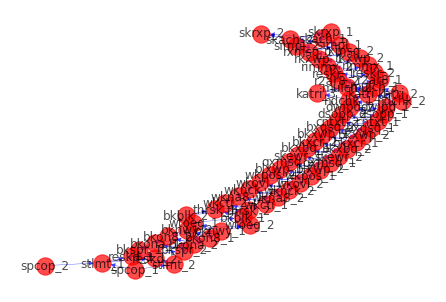

['spcop_1', 'stlmt_1', 'stlmt_2', 'spcop_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2', 'skrxp_1', 'skrxp_2']
Number of edges 140
Number of Nodes 73
High ranked column ----> skrxp

DiGraph


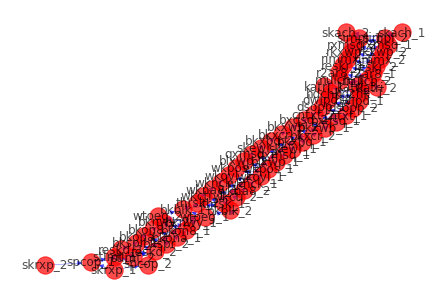

['skrxp_1', 'spcop_1', 'skrxp_2', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'rxmsq_1', 'rxmsq_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 139
Number of Nodes 73
High ranked column ----> rxmsq

DiGraph


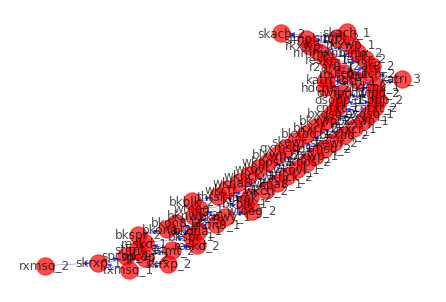

['rxmsq_1', 'skrxp_1', 'rxmsq_2', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'mulch_1', 'mulch_2', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> mulch

DiGraph


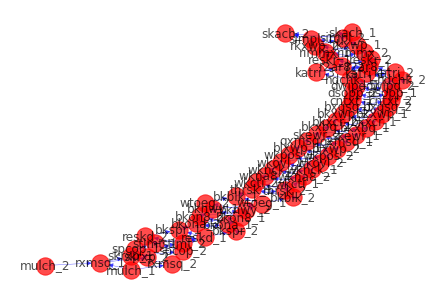

['mulch_1', 'rxmsq_1', 'rxmsq_2', 'mulch_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'bkblk_1', 'bkblk_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> bkblk

DiGraph


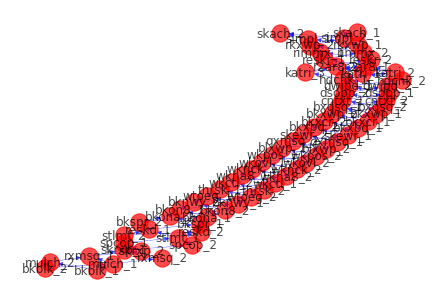

['bkblk_1', 'mulch_1', 'bkblk_2', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'r2ar8_2', 'r2ar8_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> r2ar8

DiGraph


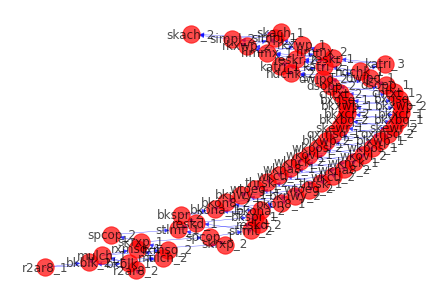

['r2ar8_2', 'bkblk_1', 'bkblk_2', 'r2ar8_1', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'reskr_1', 'reskr_2', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> reskr

DiGraph


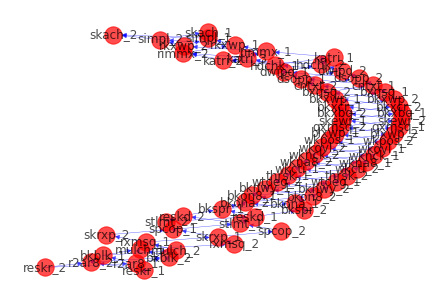

['reskr_1', 'r2ar8_2', 'reskr_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'rimmx_1', 'rimmx_2', 'rkxwp_1', 'rkxwp_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> rimmx

DiGraph


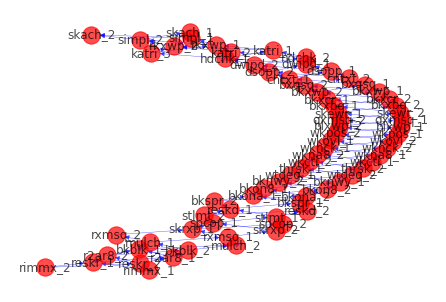

['rimmx_1', 'reskr_1', 'reskr_2', 'rimmx_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'rkxwp_1', 'rkxwp_2', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> rkxwp

DiGraph


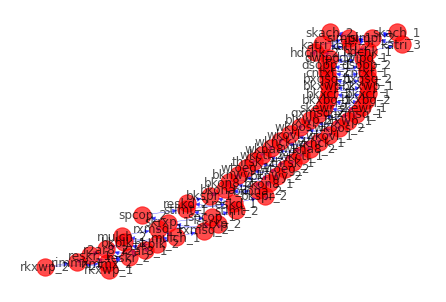

['rkxwp_1', 'rimmx_1', 'rkxwp_2', 'rimmx_2', 'reskr_1', 'reskr_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkspr_1', 'bkspr_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 138
Number of Nodes 73
High ranked column ----> bkspr

DiGraph


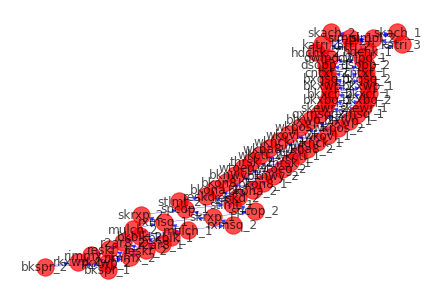

['bkspr_1', 'rkxwp_1', 'bkspr_2', 'rkxwp_2', 'rimmx_1', 'rimmx_2', 'reskr_1', 'reskr_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'simpl_1', 'simpl_2', 'skach_1', 'skach_2']
Number of edges 139
Number of Nodes 73
High ranked column ----> simpl

DiGraph


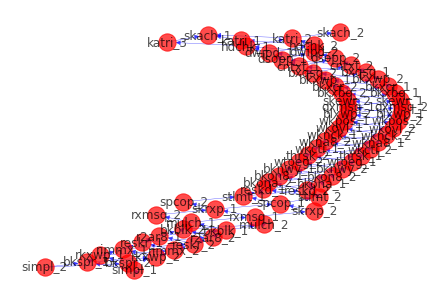

['simpl_1', 'bkspr_1', 'bkspr_2', 'simpl_2', 'rkxwp_1', 'rkxwp_2', 'rimmx_1', 'rimmx_2', 'reskr_1', 'reskr_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1', 'skach_1', 'skach_2']
Number of edges 137
Number of Nodes 73
High ranked column ----> skach

DiGraph


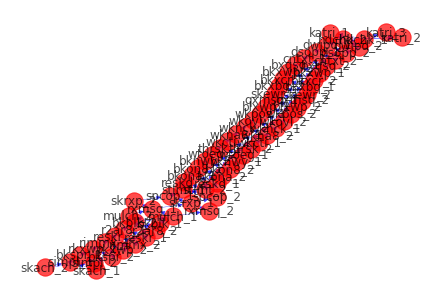

['skach_1', 'simpl_1', 'simpl_2', 'skach_2', 'bkspr_1', 'bkspr_2', 'rkxwp_1', 'rkxwp_2', 'rimmx_1', 'rimmx_2', 'reskr_1', 'reskr_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'hdchk_1', 'hdchk_2', 'katri_2', 'katri_3', 'katri_1']
Number of edges 137
Number of Nodes 73
High ranked column ----> hdchk

DiGraph


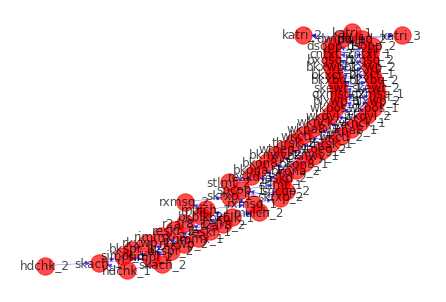

['hdchk_1', 'skach_1', 'skach_2', 'hdchk_2', 'simpl_1', 'simpl_2', 'bkspr_1', 'bkspr_2', 'rkxwp_1', 'rkxwp_2', 'rimmx_1', 'rimmx_2', 'reskr_1', 'reskr_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'stlmt_1', 'stlmt_2', 'reskd_1', 'reskd_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'katri_2', 'katri_3', 'katri_1']
Number of edges 137
Number of Nodes 73
High ranked column ----> stlmt

DiGraph


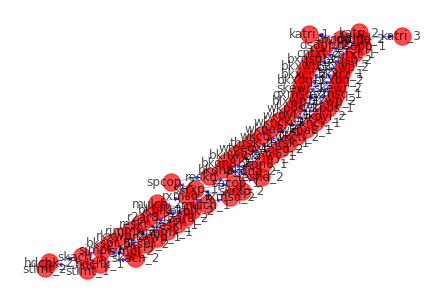

['stlmt_1', 'hdchk_1', 'stlmt_2', 'hdchk_2', 'skach_1', 'skach_2', 'simpl_1', 'simpl_2', 'bkspr_1', 'bkspr_2', 'rkxwp_1', 'rkxwp_2', 'rimmx_1', 'rimmx_2', 'reskr_1', 'reskr_2', 'r2ar8_2', 'r2ar8_1', 'bkblk_1', 'bkblk_2', 'mulch_1', 'mulch_2', 'rxmsq_1', 'rxmsq_2', 'skrxp_1', 'skrxp_2', 'spcop_1', 'spcop_2', 'reskd_1', 'reskd_2', 'bkona_1', 'bkona_2', 'bkon8_1', 'bkon8_2', 'bknwy_1', 'bknwy_2', 'wtoeg_1', 'wtoeg_2', 'thrsk_1', 'thrsk_2', 'wkcti_1', 'wkcti_2', 'wkna8_1', 'wkna8_2', 'wknck_1', 'wknck_2', 'wkovl_2', 'wkovl_1', 'wkpos_2', 'wkpos_1', 'blxwp_1', 'blxwp_2', 'qxmsq_1', 'qxmsq_2', 'skewr_2', 'skewr_1', 'bkxbq_1', 'bkxbq_2', 'bkxcr_1', 'bkxcr_2', 'bkxwp_1', 'bkxwp_2', 'bxqsq_1', 'bxqsq_2', 'cntxt_1', 'cntxt_2', 'dsopp_1', 'dsopp_2', 'dwipd_2', 'dwipd_1', 'katri_2', 'katri_3', 'katri_1']
Number of edges 137
Number of Nodes 73
High ranked column ----> reskd


In [26]:
col_count = 0
imp_attribute = []
edge_impotance_order_final = {}
while (col_count < len(input.columns)):
    # create graph dataset
    another_input_list = create_graph_data(input)

    # create graph and node important for data set
    edge_impotance_weight,edge_impotance_order = variable_imp(another_input_list)

    # make important node as primary node
    col_name,imp = column_arrange(col_name,edge_impotance_order)
    
    imp_attribute.append(imp)
    
    edge_impotance_order_final.update({col_count:edge_impotance_weight})

    #arrange the data set as per new order
    input = input.reindex(columns=col_name)
    #input.head(5)
    col_count = col_count + 1
    #print(col_count)

In [27]:
imp_attribute

['wtoeg',
 'spcop',
 'stlmt',
 'skewr',
 'reskd',
 'qxmsq',
 'blxwp',
 'wkpos',
 'wkovl',
 'wknck',
 'wkna8',
 'wkcti',
 'thrsk',
 'bkblk',
 'wtoeg',
 'bknwy',
 'bkon8',
 'bkona',
 'bkspr',
 'reskd',
 'stlmt',
 'spcop',
 'skrxp',
 'rxmsq',
 'mulch',
 'bkblk',
 'r2ar8',
 'reskr',
 'rimmx',
 'rkxwp',
 'bkspr',
 'simpl',
 'skach',
 'hdchk',
 'stlmt',
 'reskd']

In [28]:
#

In [29]:
test = pd.DataFrame(edge_impotance_order_final)
type(test)

pandas.core.frame.DataFrame

In [30]:
test.shape

(73, 36)

In [31]:
# convert the index into column
#test.reset_index(level=0, inplace=True)
#test["attribute_name"] = test.index
test

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
wtoeg_1,0.02574,0.07143,0.07881,0.06515,0.04936,0.04551,0.06345,0.10021,0.08501,0.06694,...,0.06749,0.06384,0.06749,0.07283,0.08128,0.06991,0.07003,0.07238,0.07238,0.06938
spcop_1,0.02560,0.02529,0.06667,0.07831,0.07609,0.05026,0.07046,0.10573,0.08886,0.06874,...,0.05678,0.05255,0.05181,0.04551,0.03746,0.05455,0.04274,0.02962,0.02445,0.11377
skewr_2,0.02830,0.02784,0.02778,0.02538,0.07692,0.08969,0.09172,0.10904,0.09166,0.06881,...,0.03082,0.03017,0.03187,0.03082,0.03661,0.02747,0.02624,0.03275,0.03092,0.02778
reskd_1,0.02910,0.02878,0.02881,0.02717,0.02473,0.09091,0.11520,0.11031,0.09831,0.07486,...,0.09091,0.09091,0.09091,0.08333,0.10000,0.10000,0.12500,0.12500,0.12500,0.01886
qxmsq_1,0.03236,0.03206,0.03218,0.03047,0.02807,0.02468,0.11111,0.13014,0.10653,0.08774,...,0.03239,0.03171,0.03326,0.03212,0.03819,0.02882,0.02748,0.03390,0.03187,0.02869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reskr_1,0.07143,0.07143,0.06667,0.06667,0.07692,0.07819,0.03017,0.03011,0.02869,0.02738,...,0.09091,0.01841,0.09091,0.08186,0.09621,0.08150,0.07003,0.06221,0.05424,0.04988
reskr_2,0.07143,0.07143,0.06667,0.06667,0.07692,0.07819,0.03017,0.03011,0.02869,0.02738,...,0.09091,0.01841,0.09091,0.08186,0.09621,0.08150,0.07003,0.06221,0.05424,0.04988
skrxp_1,0.07143,0.07143,0.06667,0.06667,0.03706,0.04140,0.02423,0.02250,0.02164,0.02083,...,0.05678,0.06023,0.05361,0.05576,0.05202,0.04583,0.04102,0.03737,0.03391,0.03218
skrxp_2,0.07143,0.07143,0.06667,0.06667,0.03706,0.04140,0.02423,0.02250,0.02164,0.02083,...,0.05797,0.06365,0.05762,0.08333,0.10000,0.10000,0.12500,0.12500,0.12500,0.09091


In [32]:
#list(test.index).rpartition('_')[0]
#(list(test.index)[3]).find('_')  #rpartition('_')
test['col_name'] = ''
for i in range(len(test.index)):
    test['col_name'][i] = test.index[i].rpartition('_')[0]

<ipython-input-32-5842f937ae9b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['col_name'][i] = test.index[i].rpartition('_')[0]


In [33]:
test['min_of_iteration']= test.min(axis=1)
final = pd.DataFrame(test.groupby(['col_name'])['min_of_iteration'].agg('sum'))

In [34]:
final.sort_values('min_of_iteration')

,min_of_iteration
col_name,
wkpos,0.03576
hdchk,0.03576
wkovl,0.03582
wknck,0.03588
wkna8,0.03594
wkcti,0.03602
thrsk,0.03610
skrxp,0.03620
skach,0.03630


In [35]:
test.to_csv('/home/abhishek/Graph/7_chess_output.csv', sep=',', encoding='utf-8')